In [ ]:
import numpy as np
import pandas as pd


In [ ]:
df=pd.read_excel('/content/Sales_Data.xlsx')

In [ ]:
df.shape

(2747, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ORDERNUMBER           2747 non-null   int64  
 1   QUANTITYORDERED       2747 non-null   int64  
 2   PRICEEACH             2747 non-null   float64
 3   ORDERLINENUMBER       2747 non-null   int64  
 4   SALES                 2747 non-null   float64
 5   ORDERDATE             2747 non-null   int64  
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64  
 7   STATUS                2747 non-null   object 
 8   PRODUCTLINE           2747 non-null   object 
 9   MSRP                  2747 non-null   int64  
 10  PRODUCTCODE           2747 non-null   object 
 11  CUSTOMERNAME          2747 non-null   object 
 12  PHONE                 2747 non-null   object 
 13  ADDRESSLINE1          2747 non-null   object 
 14  CITY                  2747 non-null   object 
 15  POSTALCODE           

Order date is int data type , we have to convert this to datetime format

In [ ]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,MSRP
count,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000
mean,10259.761558,35.103021,101.098951,6.491081,3553.047583,43598.914088,1757.085912,100.691664
std,91.877521,9.762135,42.042548,4.230544,1838.953901,230.231295,819.280576,40.114802
min,10100.000000,6.000000,26.880000,1.000000,482.130000,43106.000000,42.000000,33.000000
25%,10181.000000,27.000000,68.745000,3.000000,2204.350000,43412.000000,1077.000000,68.000000
50%,10264.000000,35.000000,95.550000,6.000000,3184.800000,43640.000000,1761.000000,99.000000
75%,10334.500000,43.000000,127.100000,9.000000,4503.095000,43786.000000,2436.500000,124.000000
max,10425.000000,97.000000,252.870000,18.000000,14082.800000,43982.000000,3562.000000,214.000000


In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns

# Step 2: Perform value_counts() for each categorical column
for col in categorical_columns:
    print(f"Value Counts for {col}:")
    print(df[col].value_counts())
    print("\n")

Value Counts for STATUS:
Shipped       2541
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: STATUS, dtype: int64


Value Counts for PRODUCTLINE:
Classic Cars        949
Vintage Cars        579
Motorcycles         313
Planes              304
Trucks and Buses    295
Ships               230
Trains               77
Name: PRODUCTLINE, dtype: int64


Value Counts for PRODUCTCODE:
S18_3232    51
S32_2509    28
S50_1392    28
S24_2840    28
S24_1444    28
            ..
S24_2887    22
S18_2248    21
S18_1749    21
S18_4409    21
S24_3969    21
Name: PRODUCTCODE, Length: 109, dtype: int64


Value Counts for CUSTOMERNAME:
Euro Shopping Channel           259
Mini Gifts Distributors Ltd.    180
Australian Collectors, Co.       55
La Rochelle Gifts                53
AV Stores, Co.                   51
                               ... 
Microscale Inc.                  10
Royale Belge                      8
Auto-Moto Classics Inc.           8
Ate

In [ ]:
df.head().T

,0,1,2,3,4
ORDERNUMBER,10107,10121,10134,10145,10168
QUANTITYORDERED,30,34,41,45,36
PRICEEACH,95.7,81.35,94.74,83.26,96.66
ORDERLINENUMBER,2,5,2,6,1
SALES,2871.0,2765.9,3884.34,3746.7,3479.76
ORDERDATE,43155,43227,43282,43337,43401
DAYS_SINCE_LASTORDER,828,757,703,649,586
STATUS,Shipped,Shipped,Shipped,Shipped,Shipped
PRODUCTLINE,Motorcycles,Motorcycles,Motorcycles,Motorcycles,Motorcycles
MSRP,95,95,95,95,95


In [ ]:
df.tail()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
2742,10350,20,112.22,15,2244.40,43801,2924,Shipped,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Small
2743,10373,29,137.19,1,3978.51,43861,2865,Shipped,Ships,54,S72_3212,"Oulu Toy Supplies, Inc.",981-443655,Torikatu 38,Oulu,90110,Finland,Koskitalo,Pirkko,Medium
2744,10386,43,125.99,4,5417.57,43891,2836,Resolved,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Medium
2745,10397,34,62.24,1,2116.16,43918,2810,Shipped,Ships,54,S72_3212,Alpha Cognac,61.77.6555,1 rue Alsace-Lorraine,Toulouse,31000,France,Roulet,Annette,Small
2746,10414,47,65.52,9,3079.44,43957,2772,On Hold,Ships,54,S72_3212,Gifts4AllAges.com,6175559555,8616 Spinnaker Dr.,Boston,51003,USA,Yoshido,Juri,Medium


In [ ]:
df.ORDERDATE.value_counts()

43418    38
43793    35
43416    34
43786    32
43773    29
         ..
43869     1
43383     1
43498     1
43705     1
43211     1
Name: ORDERDATE, Length: 246, dtype: int64

Assumption-
We determined the maximum number of days since the last order and then calculated the difference between this value and the corresponding order date to establish a reference point. We consider the order with the maximum days since the last order as the earliest and most distant entry in our data, serving as the reference for the first order in our dataset.

In [ ]:
df['ORDERDATE'] = df['ORDERDATE'] - 39580

In [ ]:
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,3575,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,3647,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,3702,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,3757,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,3821,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742,10350,20,112.22,15,2244.40,4221,2924,Shipped,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Small
2743,10373,29,137.19,1,3978.51,4281,2865,Shipped,Ships,54,S72_3212,"Oulu Toy Supplies, Inc.",981-443655,Torikatu 38,Oulu,90110,Finland,Koskitalo,Pirkko,Medium
2744,10386,43,125.99,4,5417.57,4311,2836,Resolved,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Medium
2745,10397,34,62.24,1,2116.16,4338,2810,Shipped,Ships,54,S72_3212,Alpha Cognac,61.77.6555,1 rue Alsace-Lorraine,Toulouse,31000,France,Roulet,Annette,Small


In [ ]:
import pandas as pd
from datetime import datetime, timedelta

def get_backdated_date(days):
    # Get the current date
    current_date = datetime.now()

    # Subtract the number of days from the current date
    backdated_date = current_date - timedelta(days=days)

    backdated_date = backdated_date.date()

    return backdated_date



# Apply the function to the 'days_column' and create a new 'backdated_date_column'
df['ORDERDATE'] = df['ORDERDATE'].apply(get_backdated_date)

In [ ]:
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2013-10-15,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2013-08-04,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2013-06-10,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2013-04-16,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,2013-02-11,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742,10350,20,112.22,15,2244.40,2012-01-08,2924,Shipped,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Small
2743,10373,29,137.19,1,3978.51,2011-11-09,2865,Shipped,Ships,54,S72_3212,"Oulu Toy Supplies, Inc.",981-443655,Torikatu 38,Oulu,90110,Finland,Koskitalo,Pirkko,Medium
2744,10386,43,125.99,4,5417.57,2011-10-10,2836,Resolved,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Medium
2745,10397,34,62.24,1,2116.16,2011-09-13,2810,Shipped,Ships,54,S72_3212,Alpha Cognac,61.77.6555,1 rue Alsace-Lorraine,Toulouse,31000,France,Roulet,Annette,Small


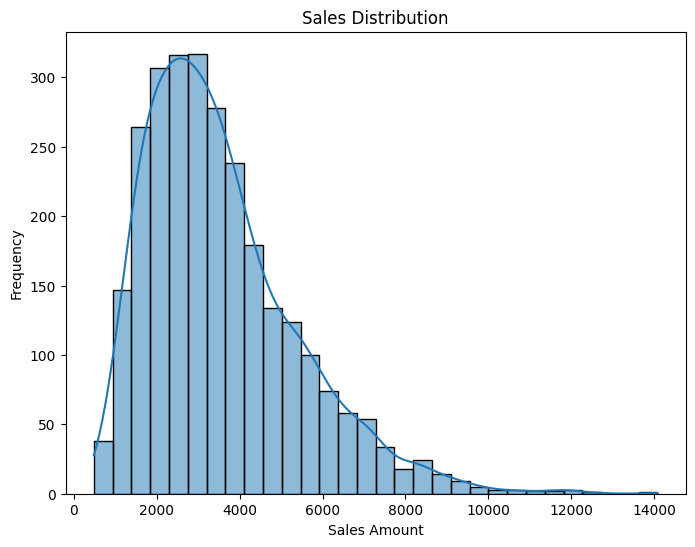

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

# Step 2: Univariate Analysis - Sales Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['SALES'], bins=30, kde=True)
plt.title("Sales Distribution")
plt.xlabel("Sales Amount")
plt.ylabel("Frequency")
plt.show()




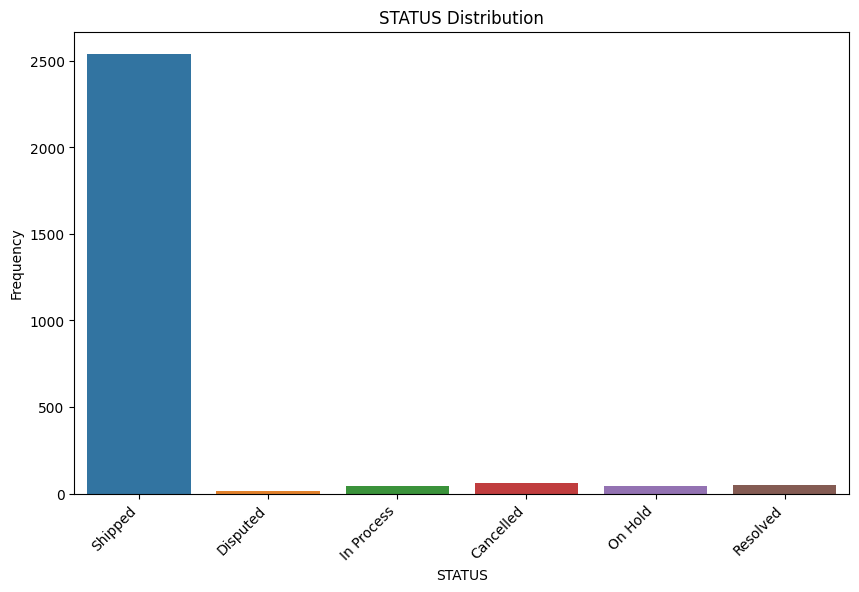

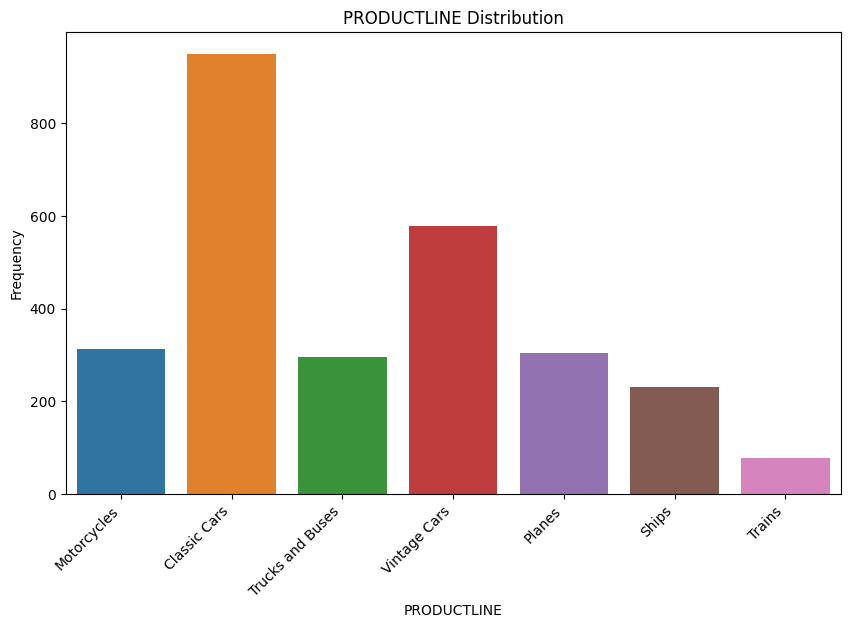

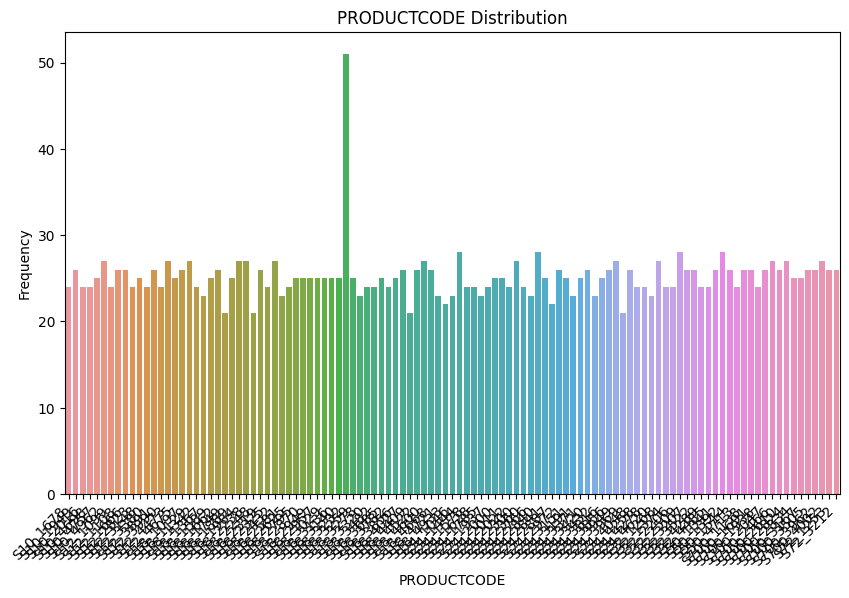

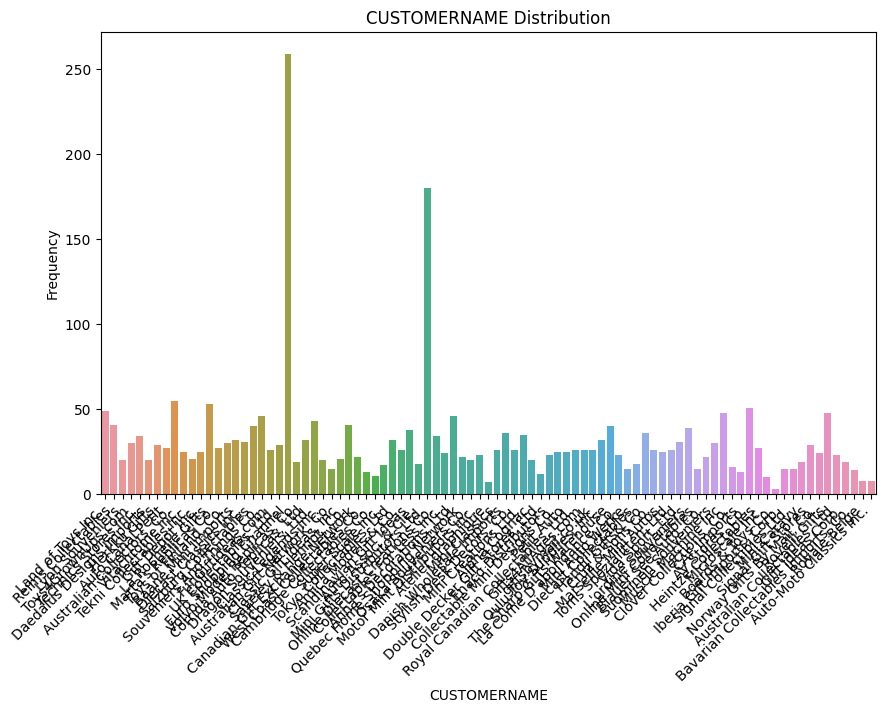

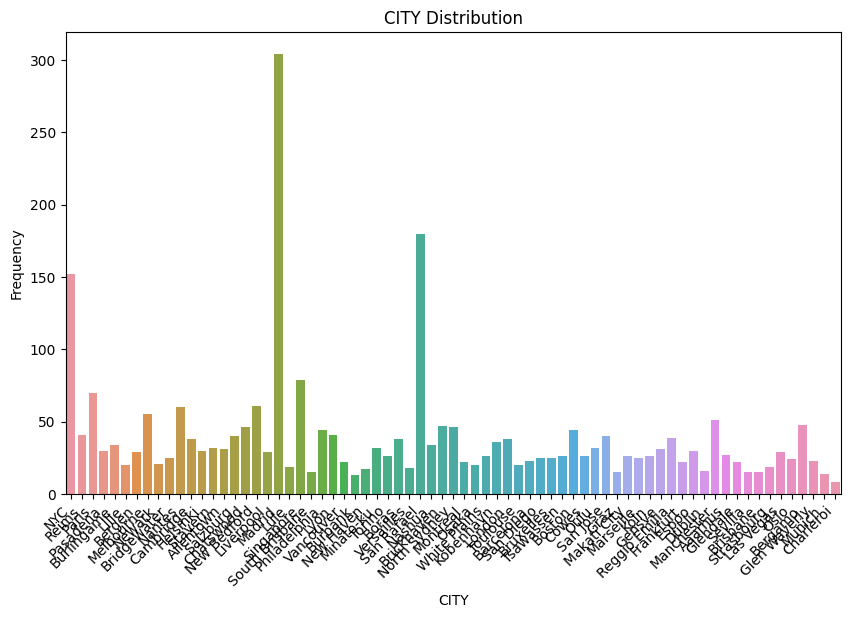

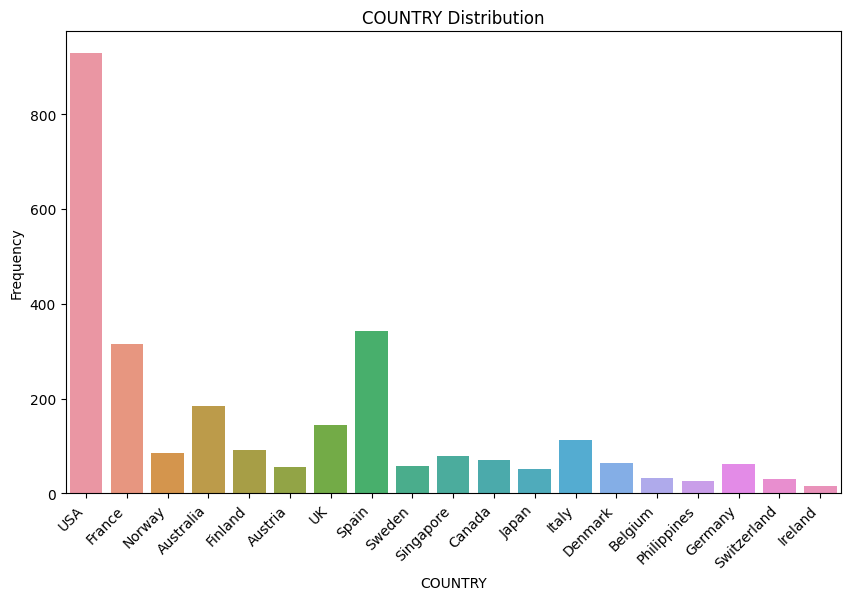

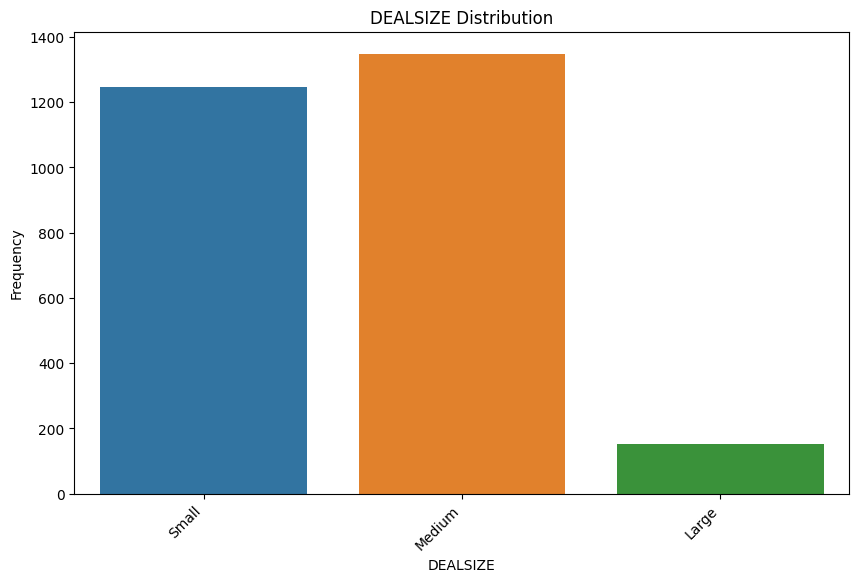

In [ ]:
categorical_columns = ['STATUS', 'PRODUCTLINE', 'PRODUCTCODE', 'CUSTOMERNAME', 'CITY', 'COUNTRY', 'DEALSIZE']

for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=df)
    plt.title(f"{col} Distribution")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.xticks(rotation=45, ha='right')
    plt.show()

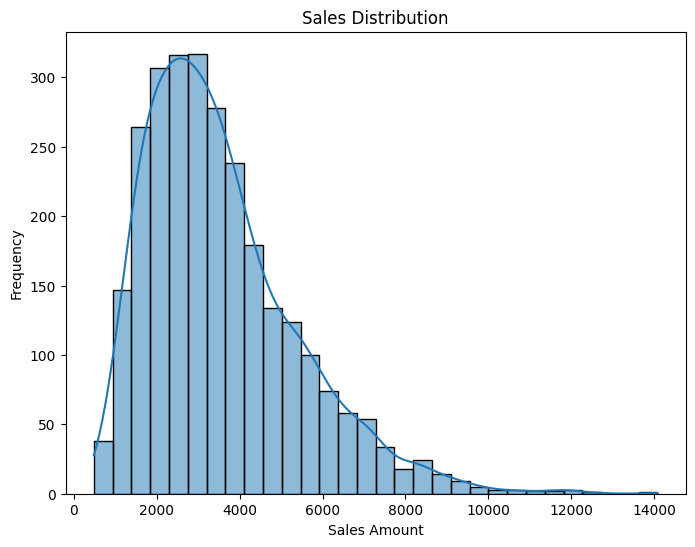

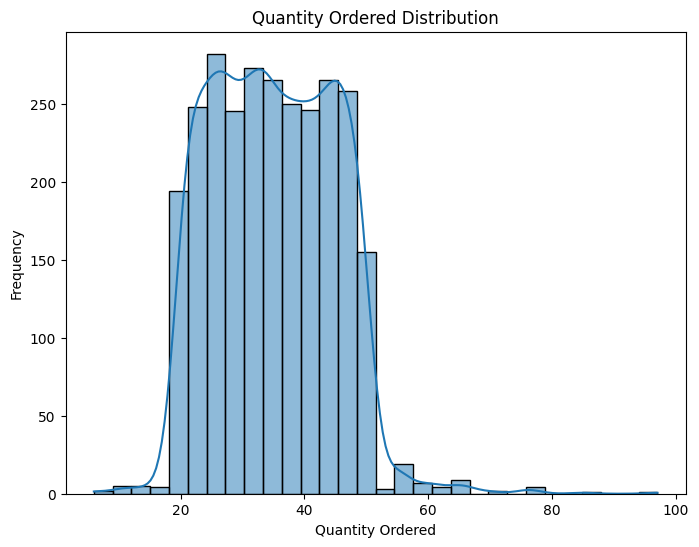

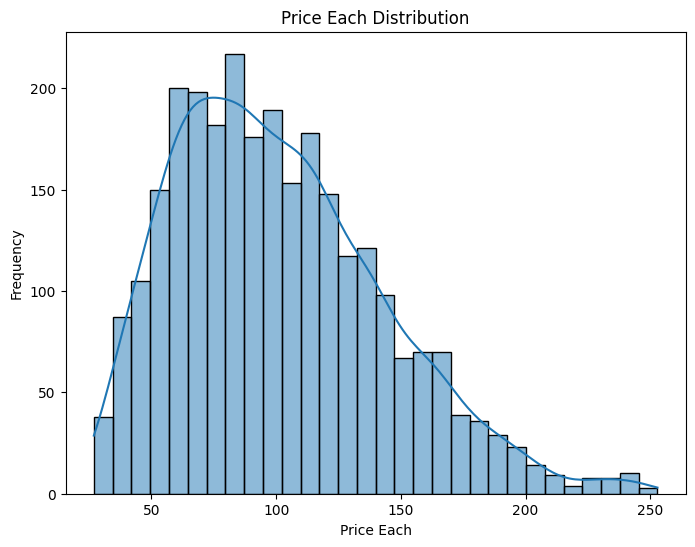

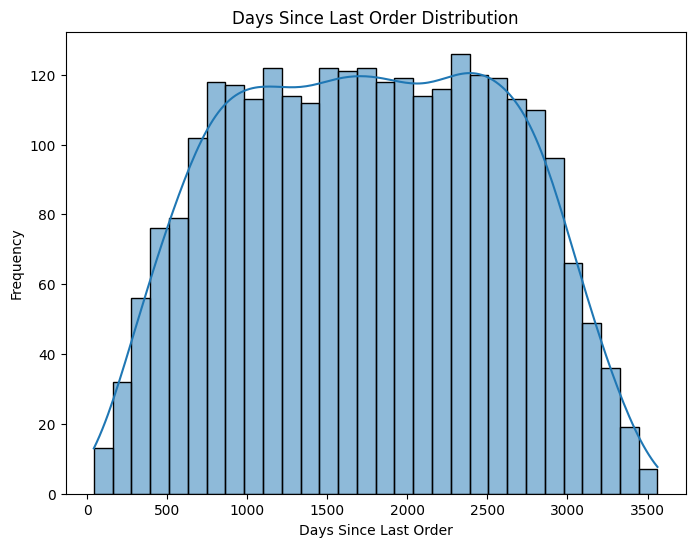

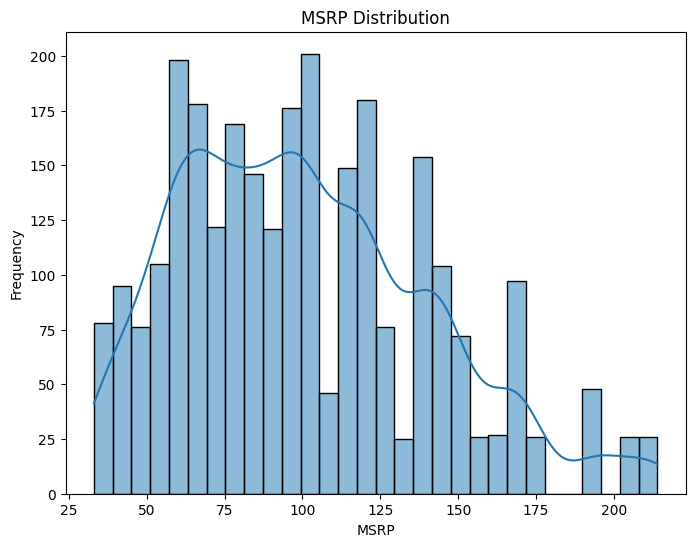

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Assuming your DataFrame is named 'df'
# Univariate Analysis - Sales Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['SALES'], bins=30, kde=True)
plt.title("Sales Distribution")
plt.xlabel("Sales Amount")
plt.ylabel("Frequency")
plt.show()

# Univariate Analysis - Quantity Ordered Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['QUANTITYORDERED'], bins=30, kde=True)
plt.title("Quantity Ordered Distribution")
plt.xlabel("Quantity Ordered")
plt.ylabel("Frequency")
plt.show()

# Univariate Analysis - Price Each Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['PRICEEACH'], bins=30, kde=True)
plt.title("Price Each Distribution")
plt.xlabel("Price Each")
plt.ylabel("Frequency")
plt.show()

# Univariate Analysis - Days Since Last Order Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['DAYS_SINCE_LASTORDER'], bins=30, kde=True)
plt.title("Days Since Last Order Distribution")
plt.xlabel("Days Since Last Order")
plt.ylabel("Frequency")
plt.show()

# Univariate Analysis - MSRP Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['MSRP'], bins=30, kde=True)
plt.title("MSRP Distribution")
plt.xlabel("MSRP")
plt.ylabel("Frequency")
plt.show()


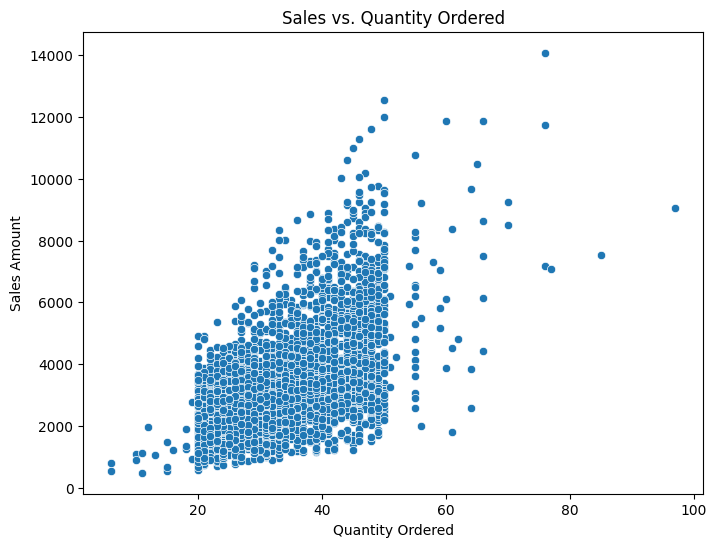

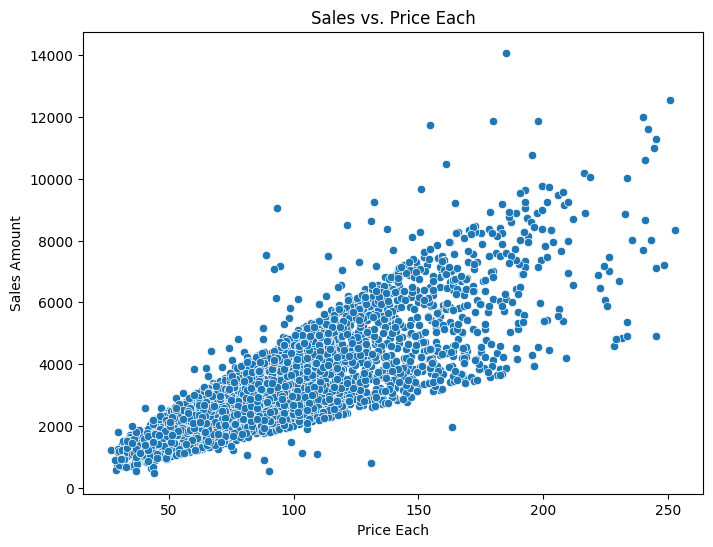

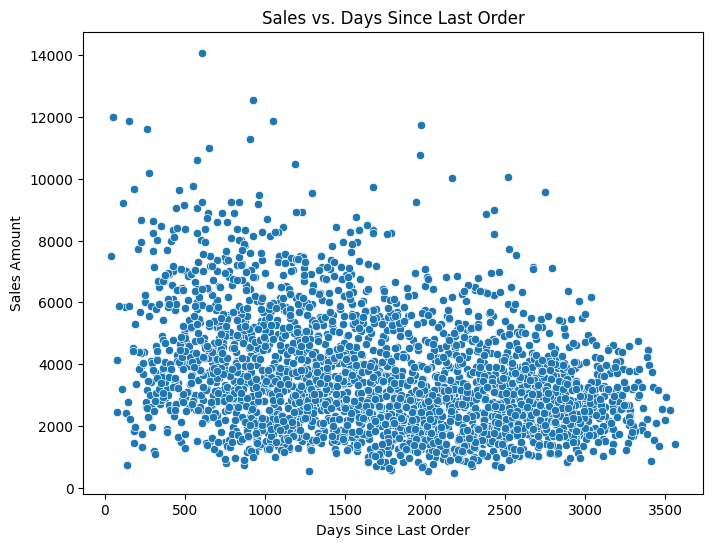

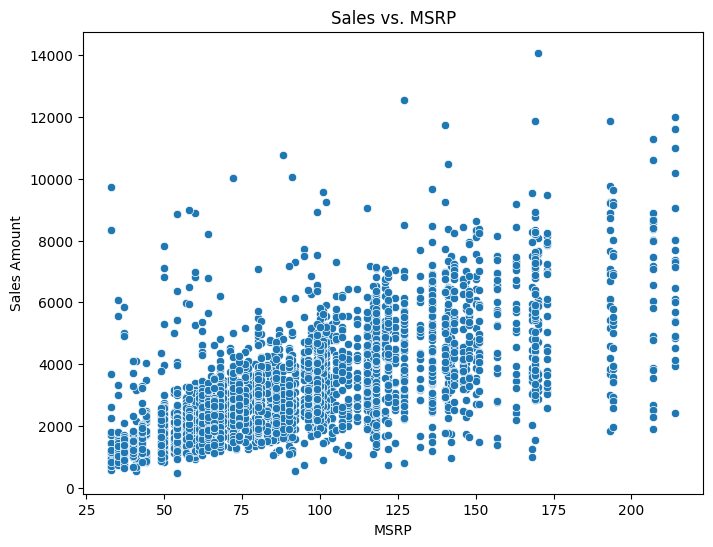

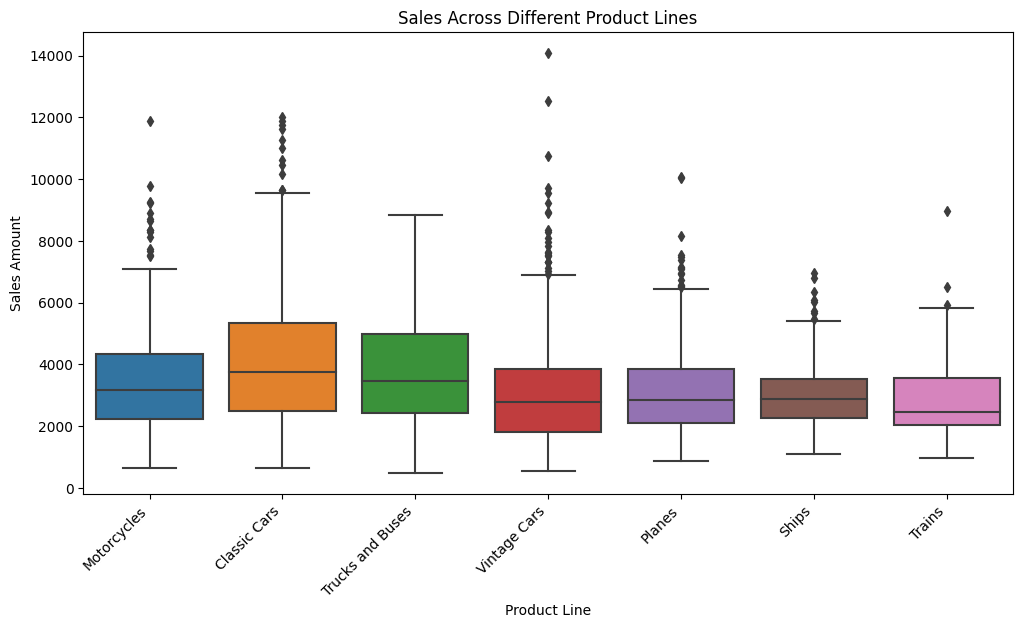

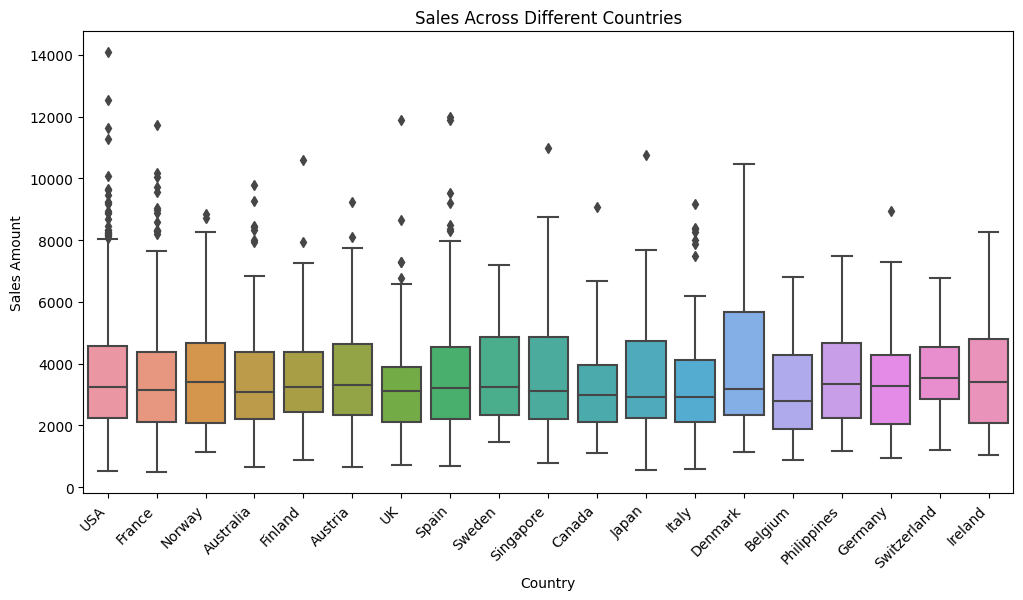

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Assuming your DataFrame is named 'df'
# Bivariate Analysis - Sales vs. Quantity Ordered
plt.figure(figsize=(8, 6))
sns.scatterplot(x='QUANTITYORDERED', y='SALES', data=df)
plt.title("Sales vs. Quantity Ordered")
plt.xlabel("Quantity Ordered")
plt.ylabel("Sales Amount")
plt.show()

# Bivariate Analysis - Sales vs. Price Each
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PRICEEACH', y='SALES', data=df)
plt.title("Sales vs. Price Each")
plt.xlabel("Price Each")
plt.ylabel("Sales Amount")
plt.show()

# Bivariate Analysis - Sales vs. Days Since Last Order
plt.figure(figsize=(8, 6))
sns.scatterplot(x='DAYS_SINCE_LASTORDER', y='SALES', data=df)
plt.title("Sales vs. Days Since Last Order")
plt.xlabel("Days Since Last Order")
plt.ylabel("Sales Amount")
plt.show()

# Bivariate Analysis - Sales vs. MSRP
plt.figure(figsize=(8, 6))
sns.scatterplot(x='MSRP', y='SALES', data=df)
plt.title("Sales vs. MSRP")
plt.xlabel("MSRP")
plt.ylabel("Sales Amount")
plt.show()

# Bivariate Analysis - Sales Across Different Categories
plt.figure(figsize=(12, 6))
sns.boxplot(x='PRODUCTLINE', y='SALES', data=df)
plt.title("Sales Across Different Product Lines")
plt.xlabel("Product Line")
plt.ylabel("Sales Amount")
plt.xticks(rotation=45, ha='right')
plt.show()

# Bivariate Analysis - Sales Across Different Countries
plt.figure(figsize=(12, 6))
sns.boxplot(x='COUNTRY', y='SALES', data=df)
plt.title("Sales Across Different Countries")
plt.xlabel("Country")
plt.ylabel("Sales Amount")
plt.xticks(rotation=45, ha='right')
plt.show()


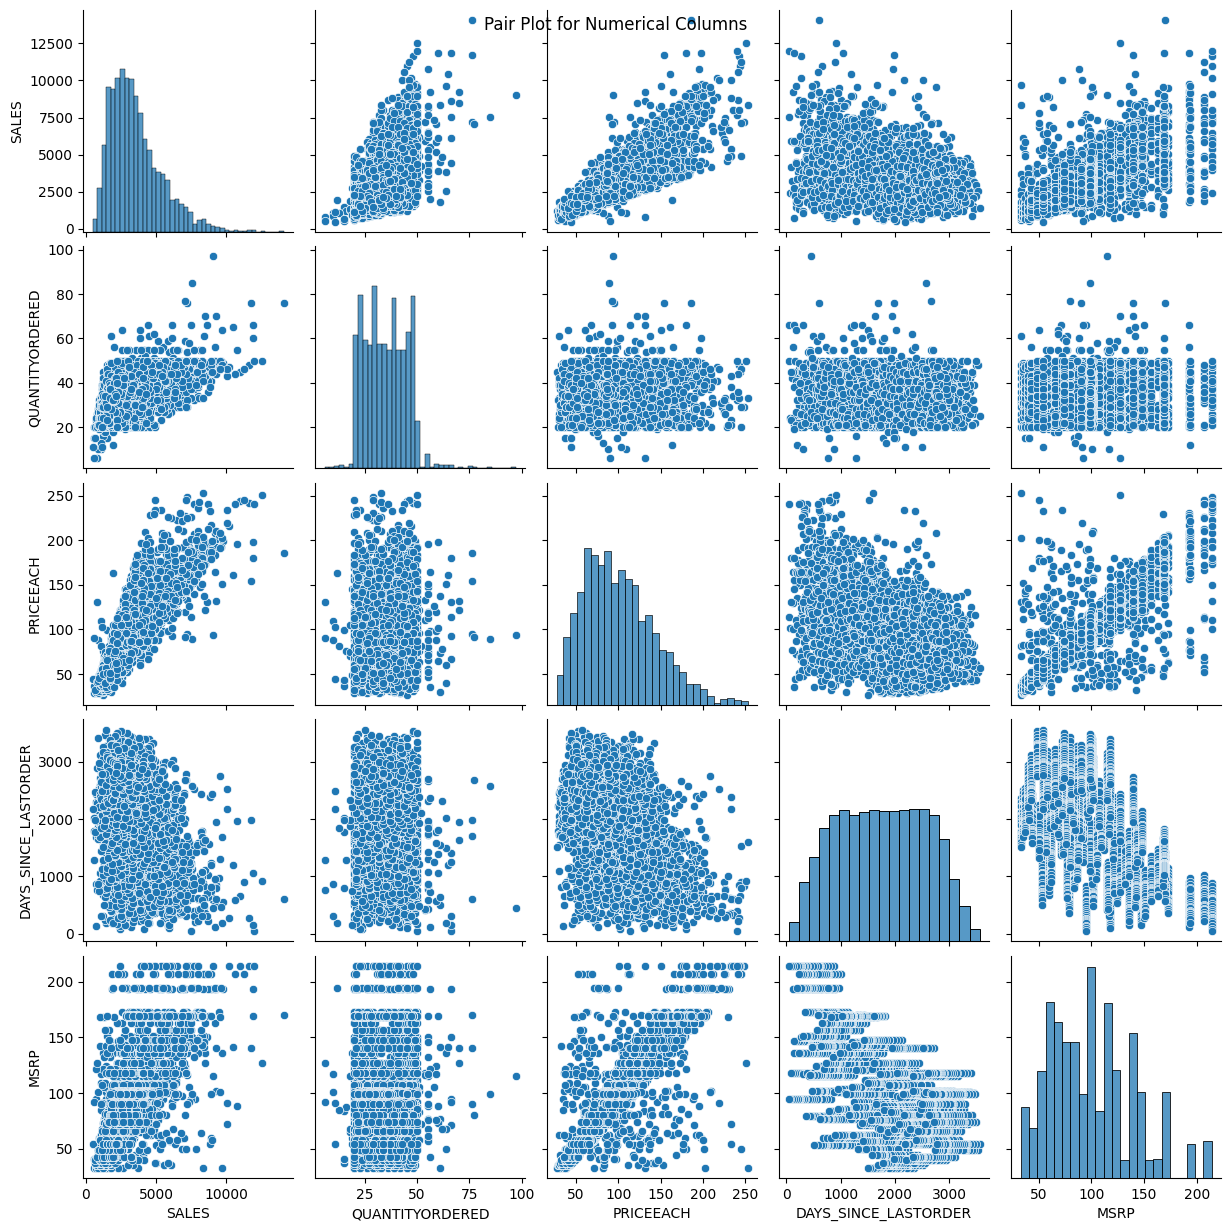

In [ ]:
# Step 1: Assuming your DataFrame is named 'df'
# Multivariate Analysis - Pair Plot for Numerical Columns
numerical_columns = ['SALES', 'QUANTITYORDERED', 'PRICEEACH', 'DAYS_SINCE_LASTORDER', 'MSRP']
sns.pairplot(df[numerical_columns])
plt.suptitle("Pair Plot for Numerical Columns")
plt.show()

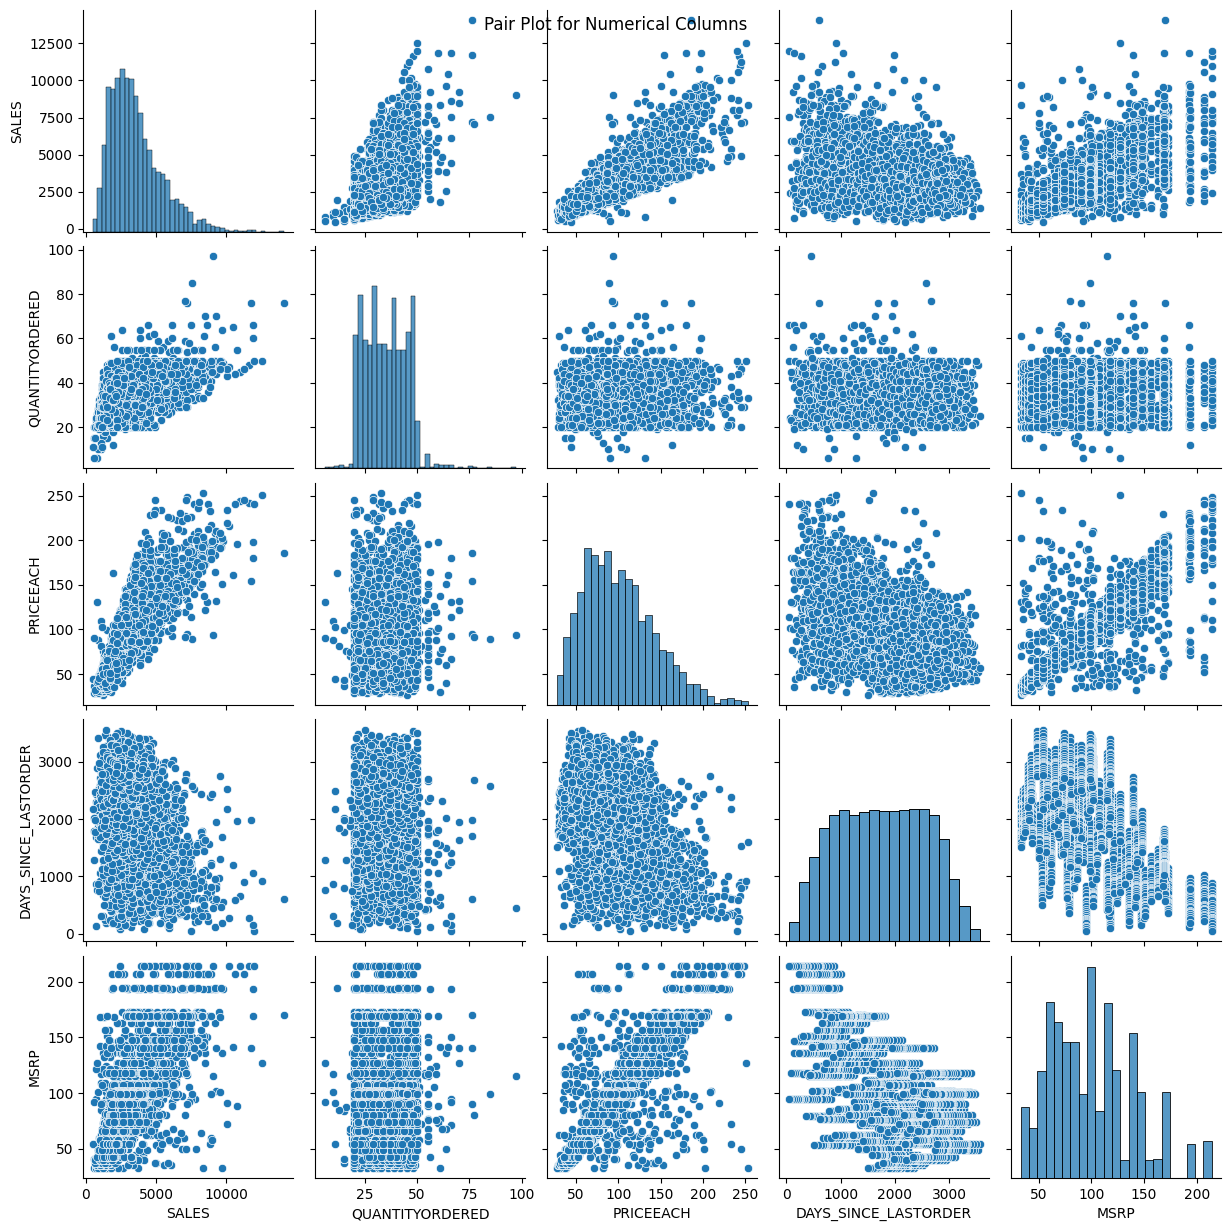

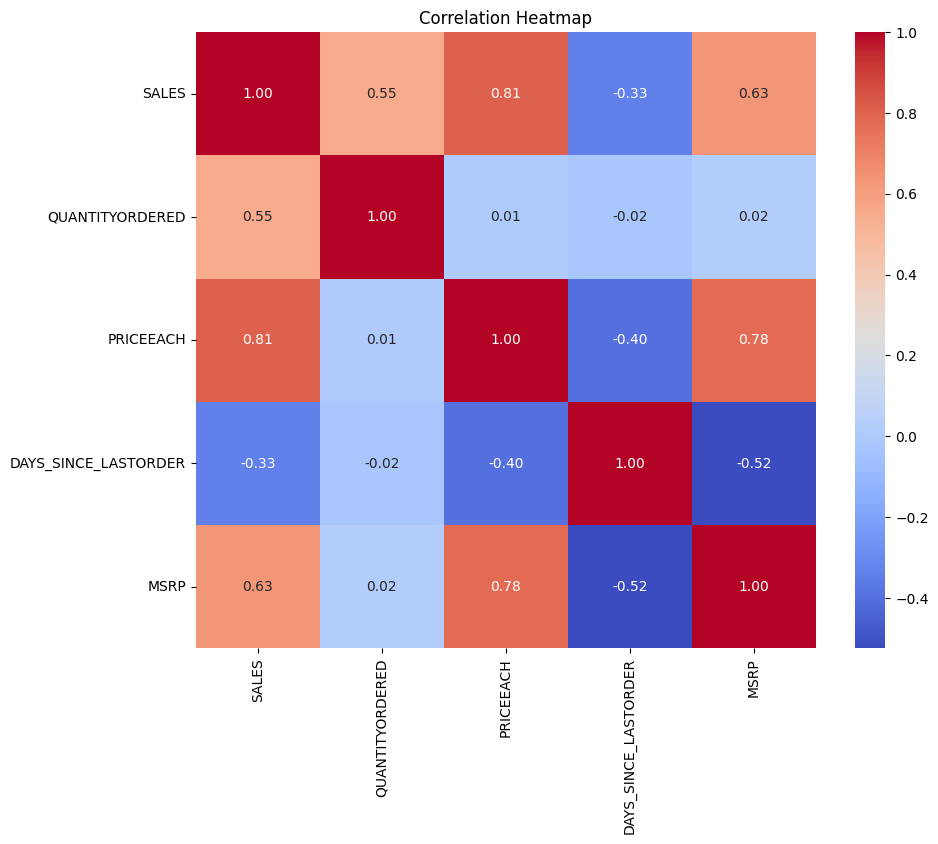

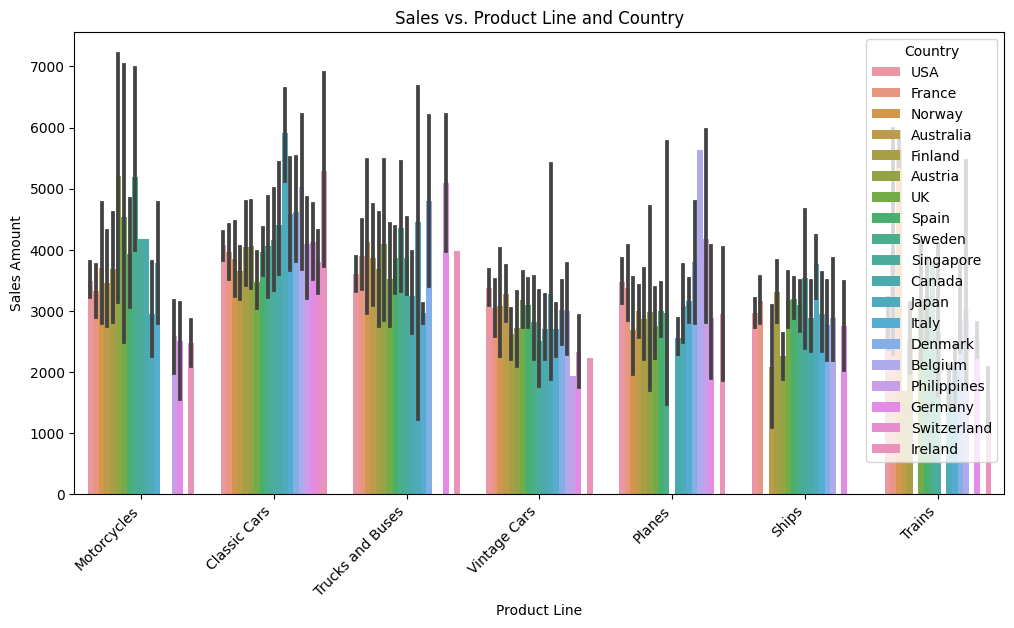

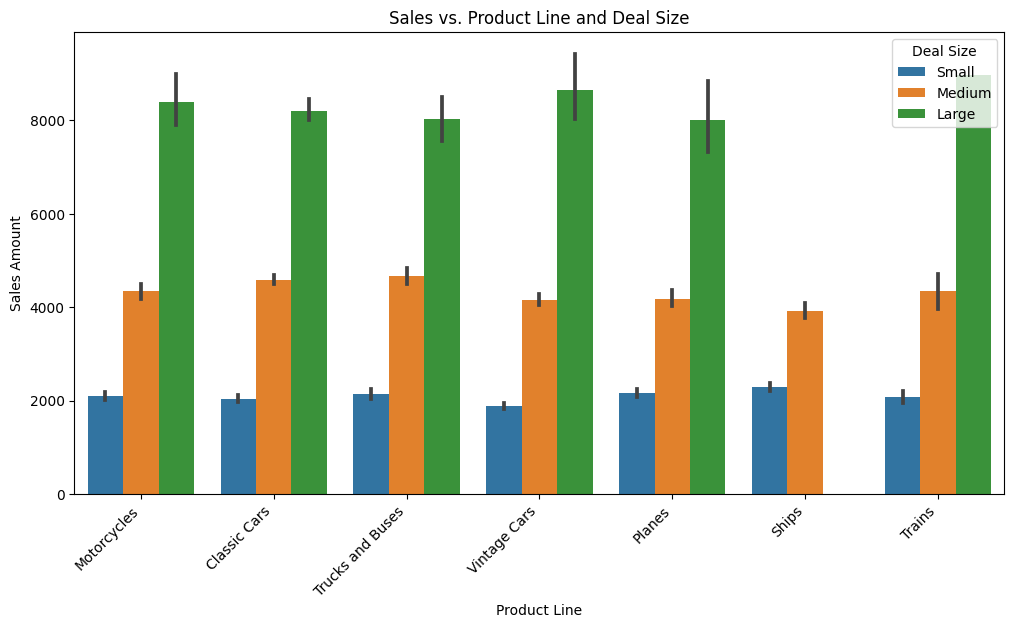

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Assuming your DataFrame is named 'df'
# Multivariate Analysis - Pair Plot for Numerical Columns
numerical_columns = ['SALES', 'QUANTITYORDERED', 'PRICEEACH', 'DAYS_SINCE_LASTORDER', 'MSRP']
sns.pairplot(df[numerical_columns])
plt.suptitle("Pair Plot for Numerical Columns")
plt.show()

# Multivariate Analysis - Heatmap for Correlation among Numerical Columns
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# Multivariate Analysis - Sales vs. Product Line and Country
plt.figure(figsize=(12, 6))
sns.barplot(x='PRODUCTLINE', y='SALES', hue='COUNTRY', data=df)
plt.title("Sales vs. Product Line and Country")
plt.xlabel("Product Line")
plt.ylabel("Sales Amount")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Country', loc='upper right')
plt.show()

# Multivariate Analysis - Sales vs. Product Line and Deal Size
plt.figure(figsize=(12, 6))
sns.barplot(x='PRODUCTLINE', y='SALES', hue='DEALSIZE', data=df)
plt.title("Sales vs. Product Line and Deal Size")
plt.xlabel("Product Line")
plt.ylabel("Sales Amount")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Deal Size', loc='upper right')
plt.show()


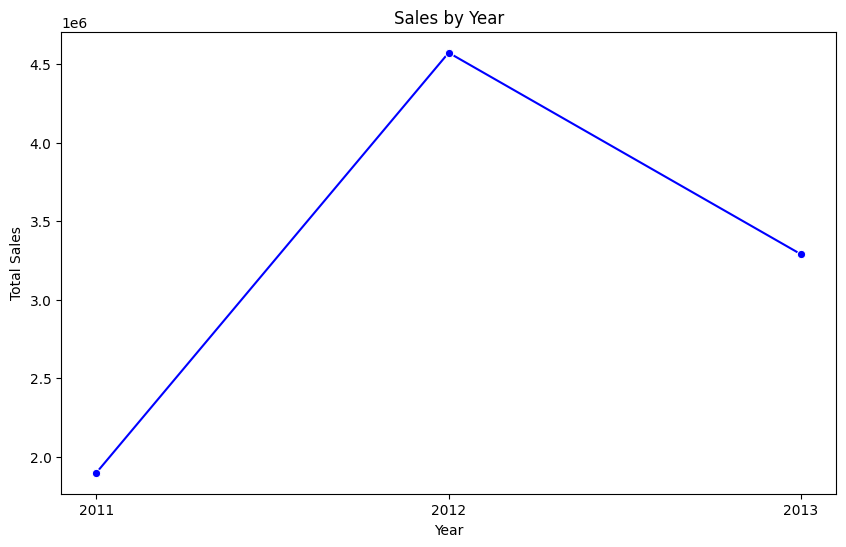

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Assuming your DataFrame is named 'df' and 'ORDERDATE' column contains the date as datetime type
# Extract year from the 'ORDERDATE' column and create a new column 'YEAR'
df['YEAR'] = df['ORDERDATE'].dt.year

# Step 2: Group the data by 'YEAR' and calculate the total sales for each year
sales_by_year = df.groupby('YEAR')['SALES'].sum().reset_index()

# Step 3: Plot the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='YEAR', y='SALES', data=sales_by_year, marker='o', color='b')
plt.title("Sales by Year")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.xticks(sales_by_year['YEAR'])
plt.show()


<ipython-input-18-a1c38908d266>:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['Week'] = df['ORDERDATE'].dt.week


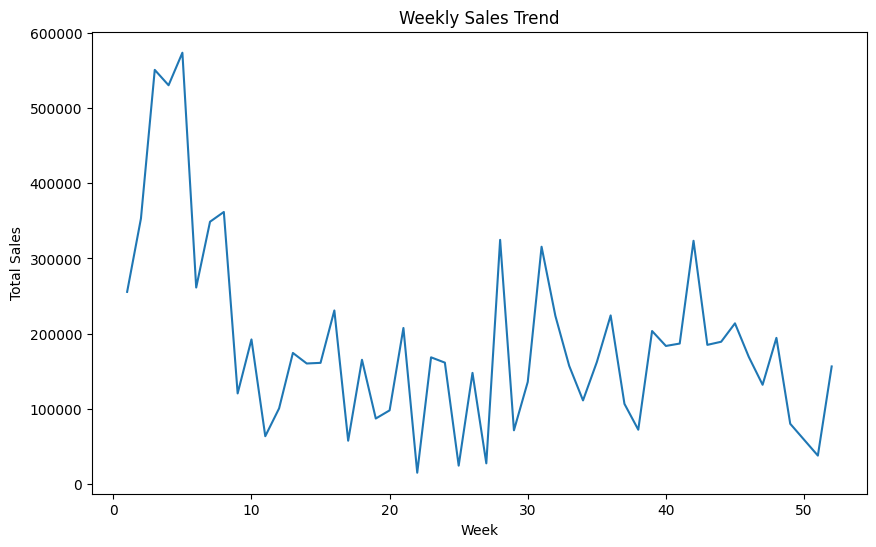

In [ ]:
# Step 3: Weekly, Monthly, Quarterly, and Yearly Trends in Sales
df['Year'] = df['ORDERDATE'].dt.year
df['Month'] = df['ORDERDATE'].dt.month
df['Quarter'] = df['ORDERDATE'].dt.quarter
df['Week'] = df['ORDERDATE'].dt.week

# Weekly Trend
plt.figure(figsize=(10, 6))
weekly_sales = df.groupby('Week')['SALES'].sum()
sns.lineplot(x=weekly_sales.index, y=weekly_sales.values)
plt.title("Weekly Sales Trend")
plt.xlabel("Week")
plt.ylabel("Total Sales")
plt.show()



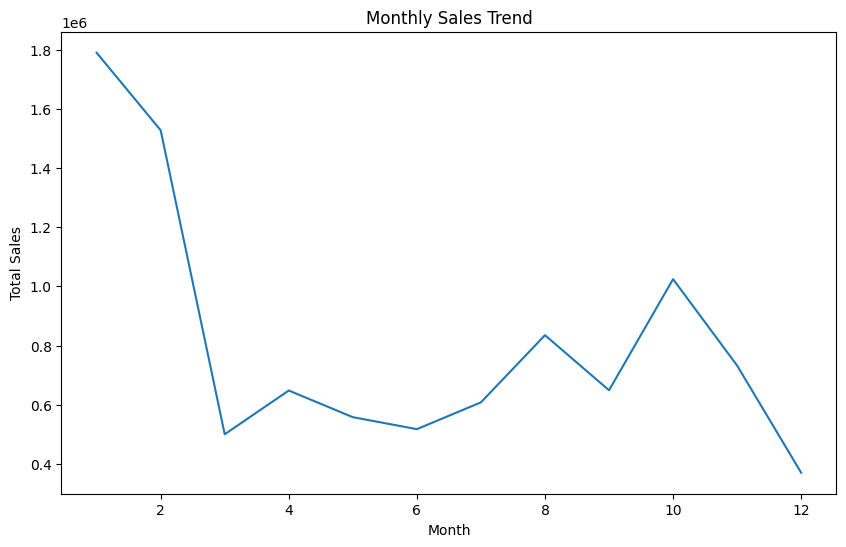

In [ ]:
# Monthly Trend
plt.figure(figsize=(10, 6))
monthly_sales = df.groupby('Month')['SALES'].sum()
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()



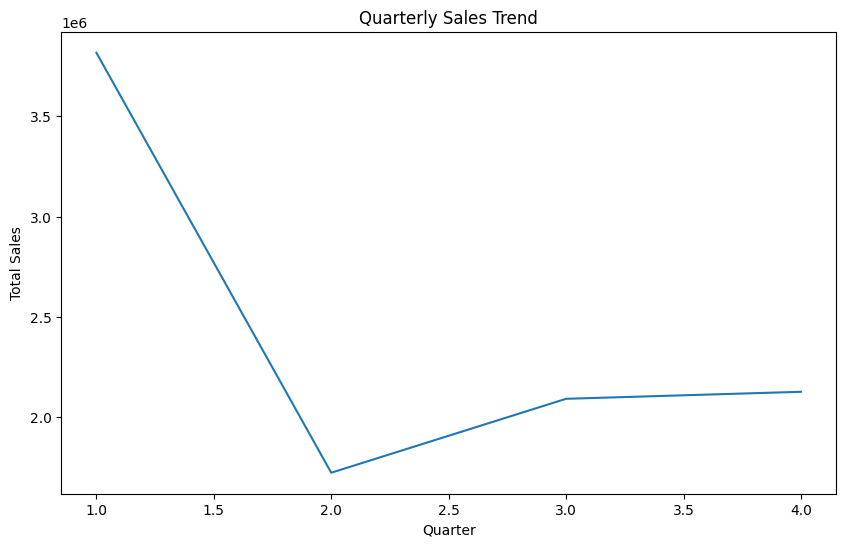

In [ ]:
# Quarterly Trend
plt.figure(figsize=(10, 6))
quarterly_sales = df.groupby('Quarter')['SALES'].sum()
sns.lineplot(x=quarterly_sales.index, y=quarterly_sales.values)
plt.title("Quarterly Sales Trend")
plt.xlabel("Quarter")
plt.ylabel("Total Sales")
plt.show()



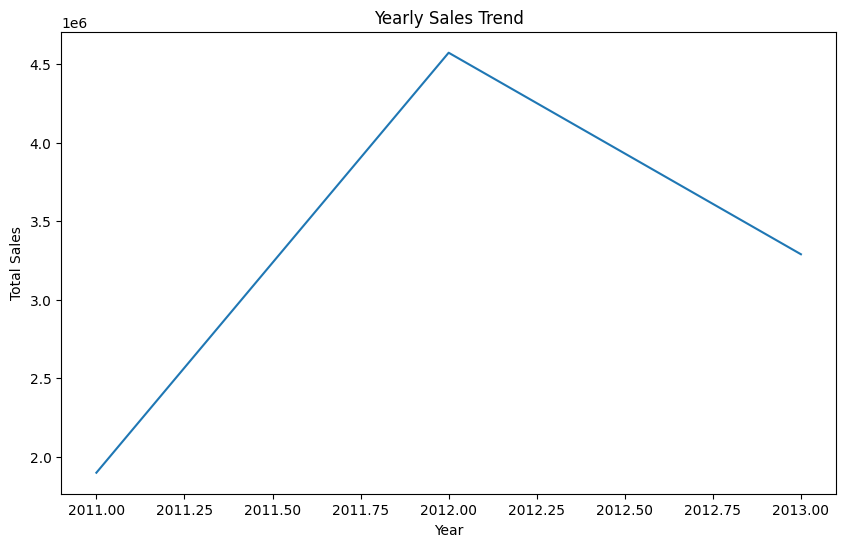

In [ ]:
# Yearly Trend
plt.figure(figsize=(10, 6))
yearly_sales = df.groupby('Year')['SALES'].sum()
sns.lineplot(x=yearly_sales.index, y=yearly_sales.values)
plt.title("Yearly Sales Trend")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.show()


In [ ]:
excel_file_path = 'output_data.xlsx'
df.to_excel(excel_file_path, index=False)

In [ ]:
min_date = df['ORDERDATE'].min()

# Find the maximum date
max_date = df['ORDERDATE'].max()

# Calculate the date range
date_range = max_date - min_date

In [ ]:
min_date = df['ORDERDATE'].min()

# Find the maximum date
max_date = df['ORDERDATE'].max()

# Calculate the date range
print(date_range)
print(min_date, max_date)

876 days 00:00:00


(Timestamp('2011-07-11 00:00:00'), Timestamp('2013-12-03 00:00:00'))

In [ ]:
grouped_data = df.groupby('CUSTOMERNAME')['ORDERNUMBER'].apply(list).reset_index()

In [ ]:
grouped_data

,CUSTOMERNAME,ORDERNUMBER
0,"AV Stores, Co.","[10306, 10306, 10306, 10332, 10332, 10110, 101..."
1,Alpha Cognac,"[10178, 10136, 10178, 10136, 10178, 10136, 101..."
2,Amica Models & Co.,"[10280, 10293, 10293, 10293, 10280, 10280, 102..."
3,"Anna's Decorations, Ltd","[10391, 10370, 10391, 10169, 10370, 10391, 101..."
4,Atelier graphique,"[10298, 10123, 10298, 10123, 10123, 10123, 10345]"
...,...,...
84,"Vida Sport, Ltd","[10225, 10287, 10225, 10287, 10225, 10287, 102..."
85,Vitachrome Inc.,"[10237, 10237, 10237, 10324, 10324, 10102, 101..."
86,"Volvo Model Replicas, Co","[10112, 10334, 10320, 10320, 10320, 10334, 103..."
87,West Coast Collectables Co.,"[10215, 10215, 10215, 10215, 10215, 10215, 102..."


In [4]:
import pandas as pd

In [5]:
df1=pd.read_excel('/content/Happy.xlsx')

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [6]:
df1

,CUSTOMERNAME,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,...,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,ORDERNUMBER [Binned],SALES [Binned],DAYS_SINCE_LASTORDER [Binned],ORDERNUMBER [Binned]Frequency,SALES [Binned]Monetary,DAYS_SINCE_LASTORDER [Binned]Recency
0,"AV Stores, Co.",51,1778,4645.31,51,157807.81,51,421,51,51,...,51,51,51,51,Bin 3,Bin 3,Bin 2,H,H,M
1,Alpha Cognac,20,687,2023.20,20,70488.44,20,675,20,20,...,20,20,20,20,Bin 1,Bin 1,Bin 3,L,L,L
2,Amica Models & Co.,26,843,2882.17,26,94117.26,26,328,26,26,...,26,26,26,26,Bin 2,Bin 2,Bin 2,M,M,M
3,"Anna's Decorations, Ltd",46,1469,4895.51,46,153996.13,46,131,46,46,...,46,46,46,46,Bin 3,Bin 3,Bin 1,H,H,H
4,Atelier graphique,7,270,645.67,7,24179.96,7,312,7,7,...,7,7,7,7,Bin 1,Bin 1,Bin 2,L,L,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,"Vida Sport, Ltd",31,1078,3474.33,31,117713.56,31,440,31,31,...,31,31,31,31,Bin 2,Bin 2,Bin 2,M,M,M
85,Vitachrome Inc.,25,787,2654.47,25,88041.26,25,432,25,25,...,25,25,25,25,Bin 2,Bin 2,Bin 2,M,M,M
86,"Volvo Model Replicas, Co",19,647,2266.49,19,75754.88,19,338,19,19,...,19,19,19,19,Bin 1,Bin 2,Bin 2,L,M,M
87,West Coast Collectables Co.,13,511,1148.00,13,46084.64,13,523,13,13,...,13,13,13,13,Bin 1,Bin 1,Bin 2,L,L,M


In [7]:
df1.columns

Index(['CUSTOMERNAME', 'ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH',
       'ORDERLINENUMBER', 'SALES', 'ORDERDATE', 'DAYS_SINCE_LASTORDER',
       'STATUS', 'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'PHONE', 'ADDRESSLINE1',
       'CITY', 'POSTALCODE', 'COUNTRY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE', 'ORDERNUMBER [Binned]', 'SALES [Binned]',
       'DAYS_SINCE_LASTORDER [Binned]', 'ORDERNUMBER [Binned]Frequency',
       'SALES [Binned]Monetary', 'DAYS_SINCE_LASTORDER [Binned]Recency'],
      dtype='object')

In [8]:
new_column_names = {'ORDERNUMBER [Binned]Frequency': 'Frequency', 'DAYS_SINCE_LASTORDER [Binned]Recency': 'Recency', 'SALES [Binned]Monetary': 'Monetary'}
df1.rename(columns=new_column_names, inplace=True)

In [9]:
df2=df1[['Frequency','Recency','Monetary','CUSTOMERNAME','DAYS_SINCE_LASTORDER','ORDERNUMBER','SALES']]

In [10]:
df2

,Frequency,Recency,Monetary,CUSTOMERNAME,DAYS_SINCE_LASTORDER,ORDERNUMBER,SALES
0,H,M,H,"AV Stores, Co.",421,51,157807.81
1,L,L,L,Alpha Cognac,675,20,70488.44
2,M,M,M,Amica Models & Co.,328,26,94117.26
3,H,H,H,"Anna's Decorations, Ltd",131,46,153996.13
4,L,M,L,Atelier graphique,312,7,24179.96
...,...,...,...,...,...,...,...
84,M,M,M,"Vida Sport, Ltd",440,31,117713.56
85,M,M,M,Vitachrome Inc.,432,25,88041.26
86,L,M,M,"Volvo Model Replicas, Co",338,19,75754.88
87,L,M,L,West Coast Collectables Co.,523,13,46084.64


In [11]:
df2['RFM'] = df2['Recency'].astype(str) + df2['Frequency'].astype(str) + df2['Monetary'].astype(str)

<ipython-input-11-bd6cc6759e59>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['RFM'] = df2['Recency'].astype(str) + df2['Frequency'].astype(str) + df2['Monetary'].astype(str)


In [12]:
df2

,Frequency,Recency,Monetary,CUSTOMERNAME,DAYS_SINCE_LASTORDER,ORDERNUMBER,SALES,RFM
0,H,M,H,"AV Stores, Co.",421,51,157807.81,MHH
1,L,L,L,Alpha Cognac,675,20,70488.44,LLL
2,M,M,M,Amica Models & Co.,328,26,94117.26,MMM
3,H,H,H,"Anna's Decorations, Ltd",131,46,153996.13,HHH
4,L,M,L,Atelier graphique,312,7,24179.96,MLL
...,...,...,...,...,...,...,...,...
84,M,M,M,"Vida Sport, Ltd",440,31,117713.56,MMM
85,M,M,M,Vitachrome Inc.,432,25,88041.26,MMM
86,L,M,M,"Volvo Model Replicas, Co",338,19,75754.88,MLM
87,L,M,L,West Coast Collectables Co.,523,13,46084.64,MLL


In [13]:
df2.RFM.value_counts()

MMM    19
HHH    11
MLL    10
LLL    10
HMM     9
LMM     8
MHH     7
MLM     4
LHH     2
MHM     2
HLL     1
LML     1
MML     1
MMH     1
HMH     1
LLM     1
HLM     1
Name: RFM, dtype: int64

In [14]:
Best_Customers= df2[df2["RFM"] == "HHH"]
Best_Customers = Best_Customers.sort_values(by="SALES", ascending=False)
Best_Customers.head()

,Frequency,Recency,Monetary,CUSTOMERNAME,DAYS_SINCE_LASTORDER,ORDERNUMBER,SALES,RFM
32,H,H,H,Euro Shopping Channel,42,259,912294.11,HHH
53,H,H,H,Mini Gifts Distributors Ltd.,219,180,654858.06,HHH
6,H,H,H,"Australian Collectors, Co.",229,55,200995.41,HHH
43,H,H,H,La Rochelle Gifts,139,53,180124.90,HHH
44,H,H,H,Land of Toys Inc.,216,49,164069.44,HHH


In [15]:
#Loyal_Customers= df2[df2["RFM"] =='HHH']
Loyal_Customers = df2.sort_values(by="ORDERNUMBER", ascending=False)
Loyal_Customers.head()

,Frequency,Recency,Monetary,CUSTOMERNAME,DAYS_SINCE_LASTORDER,ORDERNUMBER,SALES,RFM
32,H,H,H,Euro Shopping Channel,42,259,912294.11,HHH
53,H,H,H,Mini Gifts Distributors Ltd.,219,180,654858.06,HHH
6,H,H,H,"Australian Collectors, Co.",229,55,200995.41,HHH
43,H,H,H,La Rochelle Gifts,139,53,180124.90,HHH
0,H,M,H,"AV Stores, Co.",421,51,157807.81,MHH


In [16]:
risky_Customers= df2[df2["RFM"] =='LMM']
risky_Customers = risky_Customers.sort_values(by="DAYS_SINCE_LASTORDER", ascending=False)
risky_Customers.head()

,Frequency,Recency,Monetary,CUSTOMERNAME,DAYS_SINCE_LASTORDER,ORDERNUMBER,SALES,RFM
24,M,L,M,Cruz & Sons Co.,971,26,94015.73,LMM
56,M,L,M,"Norway Gifts By Mail, Co.",825,24,79224.23,LMM
46,M,L,M,Marseille Mini Autos,757,25,74936.14,LMM
13,M,L,M,"Blauer See Auto, Co.",705,22,85171.59,LMM
73,M,L,M,"Stylish Desk Decors, Co.",702,26,88804.50,LMM


In [66]:
lost_Customers= df2[df2["RFM"] =='LLL']
lost_Customers = lost_Customers.sort_values(by="DAYS_SINCE_LASTORDER", ascending=False)
lost_Customers.head()

,Frequency,Recency,Monetary,CUSTOMERNAME,DAYS_SINCE_LASTORDER,ORDERNUMBER,SALES,RFM
10,L,L,L,Auto-Moto Classics Inc.,1353,8,26479.26,LLL
35,L,L,L,Gift Ideas Corp.,947,19,57294.42,LLL
40,L,L,L,"Iberia Gift Imports, Corp.",904,15,54723.62,LLL
70,L,L,L,Signal Collectibles Ltd.,836,15,50218.51,LLL
12,L,L,L,"Bavarian Collectables Imports, Co.",801,14,34993.92,LLL


In [ ]:
pivot_table = df2.pivot_table(index=['Recency', 'Frequency'],columns='Monetary',values='ORDERNUMBER', aggfunc='count')

In [ ]:
pivot_table

Monetary              H     L     M
Recency Frequency                  
H       H          11.0   NaN   NaN
        L           NaN   1.0   1.0
        M           1.0   NaN   9.0
L       H           2.0   NaN   NaN
        L           NaN  10.0   1.0
        M           NaN   1.0   8.0
M       H           7.0   NaN   2.0
        L           NaN  10.0   4.0
        M           1.0   1.0  19.0

In [ ]:
pivot_table.fillna(0, inplace=True)

In [ ]:
pivot_table

Monetary              H     L     M
Recency Frequency                  
H       H          11.0   0.0   0.0
        L           0.0   1.0   1.0
        M           1.0   0.0   9.0
L       H           2.0   0.0   0.0
        L           0.0  10.0   1.0
        M           0.0   1.0   8.0
M       H           7.0   0.0   2.0
        L           0.0  10.0   4.0
        M           1.0   1.0  19.0